<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Churn_PyCaret_19nov_gbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

https://colab.research.google.com/drive/17o3DEBv2T8K3V5k9RXksLpsXUxcwSZgH#scrollTo=BxTKAJoLC6U7

In [2]:
!pip install pycaret # Instalar PyCaret no Colab

     |████████████████████████████████| 256kB 7.4MB/s 
     |████████████████████████████████| 1.6MB 8.2MB/s 
     |████████████████████████████████| 266kB 29.5MB/s 
     |████████████████████████████████| 1.8MB 30.5MB/s 
     |████████████████████████████████| 148.9MB 68kB/s 
     |████████████████████████████████| 6.8MB 48.3MB/s 
     |████████████████████████████████| 66.3MB 65kB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 276kB 44.8MB/s 
     |████████████████████████████████| 13.9MB 49.6MB/s 
     |████████████████████████████████| 174kB 47.8MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 3.1MB 37.9MB/s 
     |████████████████████████████████| 604kB 45.3MB/s 
     |████████████████████████████████| 2.1MB 35.8MB/s 
     |████████████████████████████████| 337kB 45.9MB/s 

In [62]:
# Carregar bibliotecas
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret
from pycaret.classification import *                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão
from pycaret.utils import enable_colab                # Para executar gráficos no Colab
from pycaret import classification as pyclass 
from pycaret import regression as pyreg

In [63]:
url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

In [79]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [80]:
def trata_Dependents(df):
  linha_Dependents_nan = df[df['Dependents'].isna()].index
  for i in linha_Dependents_nan:
    if df['Partner'][i] == 'Yes':
      df['Dependents'][i] = 'Yes'
    else:
      df['Dependents'][i] = 'No'
  return df

In [81]:
def trata_PaymentMethod(df):
  indice = df[df['PaymentMethod'].isna()].index
  for i in indice:
    if df['Contract'][i]=='Month-to-month':
      moda = df['PaymentMethod'][df['Contract']=='Month-to-month'].mode(0)
      df['PaymentMethod'][i] = moda[0]
    if df['Contract'][i] =='Two year':
      moda = df['PaymentMethod'][df['Contract']=='Two year'].mode(0)
      df['PaymentMethod'][i] = moda[0]
    if df['Contract'][i] =='One year':
      moda = df['PaymentMethod'][df['Contract']=='One year'].mode(0)
      df['PaymentMethod'][i] = moda[0]
  return df

In [4]:
df_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
df_train['TotalCharges'] = df_train['TotalCharges'].replace(' ', '0')
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'])
c = []

In [75]:
c=[]

In [ ]:
c = df_train[['tenure','TotalCharges','MonthlyCharges','Contract','InternetService','PhoneService']]
c['div']=c['TotalCharges']/c['MonthlyCharges']
c['Churn']=df_train['Churn']
c.head(20)

In [77]:
c.head(20)

,tenure,TotalCharges,MonthlyCharges,Contract,InternetService,PhoneService,div,Churn
0,56.0,2560.10,45.05,Two year,DSL,No,56.827969,0
1,NaN,332.65,19.65,One year,No,Yes,16.928753,0
2,60.0,6640.70,110.80,Two year,Fiber optic,Yes,59.934116,0
3,37.0,3545.35,101.90,Month-to-month,Fiber optic,Yes,34.792444,1
4,29.0,1974.80,70.75,Month-to-month,Fiber optic,Yes,27.912367,1
5,70.0,3442.80,48.40,Two year,DSL,No,71.132231,0
6,31.0,1848.80,59.95,One year,DSL,No,30.839033,0
7,3.0,61.05,19.55,Month-to-month,No,Yes,3.122762,0
8,54.0,1008.70,19.65,Two year,No,Yes,51.333333,0
9,72.0,6155.40,85.10,Two year,DSL,Yes,72.331375,0


In [82]:
def trata_tenure(df):
  indice = df[df['tenure'].isna()].index
  for i in indice:
    div = df['TotalCharges'][i]/df['MonthlyCharges'][i]
    df['tenure'][i] = div
  return df

In [83]:
def trata_col(df):
  df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
  df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,'0')
  df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,'1')
  trata_tenure(df)
  trata_Dependents(df)
  trata_PaymentMethod(df)
  return df

In [84]:
df_train = trata_col(df_train)
df_test = trata_col(df_test)

df_train.set_index('id', inplace=True)
df_test.set_index('id', inplace=True)

In [17]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
def dropando(df):
  df = df.drop(['OnlineSecurity','OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV','StreamingMovies'],
               axis = 1)
  return df

In [ ]:
df_train = dropando(df_train)
df_test = dropando(df_test)

In [93]:
df_train['Churn'].astype('category')

id
4030    0
6731    0
6479    0
6861    1
3266    1
       ..
6684    0
604     0
4803    0
6317    0
103     0
Name: Churn, Length: 5634, dtype: category
Categories (2, int64): [0, 1]

In [95]:
df_train['Churn'].value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [96]:
def cria_dummies(df):
  ohe=pd.get_dummies(df,drop_first=False)
  ohe.columns = ohe.columns.str.replace(' ', '_')
  ohe.columns = ohe.columns.str.replace('(','')
  ohe.columns = ohe.columns.str.replace(')','')
  return ohe

In [97]:
df_train = cria_dummies(df_train)
df_test = cria_dummies(df_test)

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5634 non-null   float64
 1   MonthlyCharges                         5634 non-null   float64
 2   TotalCharges                           5634 non-null   float64
 3   Churn                                  5634 non-null   int64  
 4   gender_Female                          5634 non-null   uint8  
 5   gender_Male                            5634 non-null   uint8  
 6   SeniorCitizen_0                        5634 non-null   uint8  
 7   SeniorCitizen_1                        5634 non-null   uint8  
 8   Partner_No                             5634 non-null   uint8  
 9   Partner_Yes                            5634 non-null   uint8  
 10  Dependents_No                          5634 non-null   uint8  
 11  De

In [ ]:
df_test.info()

In [178]:
model = pyclass.setup(data = df_train,      # Banco de dados
                      target = 'Churn',     # Desfecho que estamos tentando prever
                      train_size = 0.7,
                      remove_multicollinearity= True,
                      multicollinearity_threshold= 0.9)     # Proporção do banco de treino
       

,Description,Value
0,session_id,3563
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 47)"
5,Missing Values,False
6,Numeric Features,46
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Model	- MAE(Accuracy) -	MSE(AUC) -	RMSE(Recall) -	R2(Prec.	F1) -	RMSLE(Kappa)	-  MAPE(MCC) -  TT (Sec)

In [179]:
_# Treinar modelos
best = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8050,0.8458,0.5269,0.6671,0.5872,0.4621,0.4685,0.528
lr,Logistic Regression,0.8024,0.8460,0.5558,0.6489,0.5969,0.4674,0.4710,0.119
ada,Ada Boost Classifier,0.7991,0.8401,0.5385,0.6434,0.5850,0.4541,0.4580,0.214
ridge,Ridge Classifier,0.7974,0.0000,0.5212,0.6463,0.5757,0.4448,0.4500,0.020
lda,Linear Discriminant Analysis,0.7946,0.8383,0.5510,0.6291,0.5861,0.4504,0.4531,0.038
catboost,CatBoost Classifier,0.7928,0.8391,0.5106,0.6351,0.5653,0.4315,0.4364,3.211
lightgbm,Light Gradient Boosting Machine,0.7923,0.8334,0.5144,0.6310,0.5658,0.4314,0.4358,0.124
rf,Random Forest Classifier,0.7834,0.8209,0.4712,0.6178,0.5336,0.3962,0.4028,0.697
xgboost,Extreme Gradient Boosting,0.7778,0.8207,0.5096,0.5941,0.5473,0.4015,0.4044,0.852
et,Extra Trees Classifier,0.7702,0.7900,0.4760,0.5772,0.5210,0.3720,0.3753,0.683


In [180]:
# Criar Modelo - Siglas dos modelos: https://pycaret.org/regression/#create-model
# MAE(Accuracy) -	MSE(AUC) -	RMSE(Recall) -	R2(Prec.	F1) -	RMSLE(Kappa)	-  MAPE(MCC) -  TT (Sec)
gbc = pyclass.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8127,0.8498,0.4808,0.7143,0.5747,0.4604,0.4752
1,0.8127,0.8597,0.6058,0.6562,0.6300,0.5048,0.5056
2,0.7949,0.8419,0.5673,0.6211,0.5930,0.4563,0.4571
3,0.8096,0.8693,0.5385,0.6747,0.5989,0.4762,0.4814
4,0.8249,0.8622,0.5481,0.7215,0.6230,0.5117,0.5199
5,0.7995,0.8495,0.5577,0.6374,0.5949,0.4624,0.4643
6,0.8274,0.8517,0.5481,0.7308,0.6264,0.5171,0.5262
7,0.8122,0.8438,0.4904,0.7083,0.5795,0.4637,0.4767
8,0.7868,0.8105,0.4712,0.6282,0.5385,0.4035,0.4106
9,0.7690,0.8193,0.4615,0.5783,0.5134,0.3644,0.3684


In [ ]:
# Ver parâmetros do melhor modelo
print(rr)

In [ ]:
# Avaliar parâmetros
pyreg.plot_model(gbr, plot='parameter')

In [ ]:
# Comparar predições e resultados do banco de teste
pyclass.plot_model(log_reg, plot='error')

In [ ]:
# Comparar os resíduos
pyreg.plot_model(rr, plot='residuals')

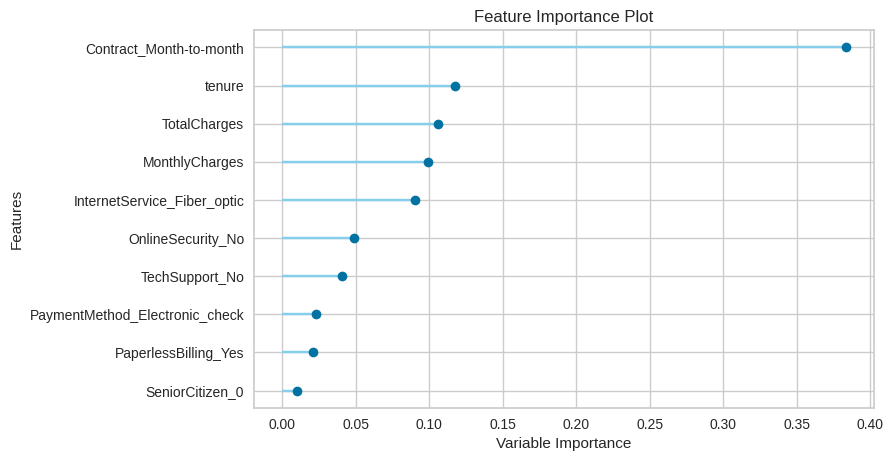

In [181]:
# Verificar importância das variáveis
pyclass.plot_model(gbc, 'feature')

In [182]:
holdout = pyclass.predict_model(gbc, data = df_test)

In [183]:
df_gbc_pycaret = holdout[['Label','Score']]

In [184]:
df_gbc_pycaret.head()

,Label,Score
id,,
5027,0,0.9617
1733,0,0.8392
5384,0,0.5404
6554,0,0.9703
364,0,0.9817


In [185]:
#log_reg_holdout = pyreg.predict_model(log_reg, data = df_test)
#log_reg_holdout['Churn'] = abs(round(log_reg_holdout['Label'],0))
#log_reg_holdout['Churn'] = log_reg_holdout['Churn'].astype('int')
holdout['Label'].value_counts()

0    1126
1     283
Name: Label, dtype: int64

In [186]:
df_submit = pd.DataFrame(zip(holdout.index, holdout['Label']), columns=['id','Churn'])
df_submit.to_csv('Churn_pycaret_gbc.csv', index=False, sep=',')

In [187]:
df_submit['Churn'].value_counts()

0    1126
1     283
Name: Churn, dtype: int64

## TUNED

In [193]:
tuned_gbc = pyclass.tune_model(gbc, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.8528,0.5000,0.7222,0.5909,0.4786,0.4920
1,0.8152,0.8650,0.6154,0.6598,0.6368,0.5131,0.5136
2,0.7797,0.8348,0.5288,0.5914,0.5584,0.4123,0.4134
3,0.8071,0.8756,0.5288,0.6707,0.5914,0.4675,0.4731
4,0.8223,0.8631,0.5673,0.7024,0.6277,0.5127,0.5178
5,0.8071,0.8426,0.5673,0.6556,0.6082,0.4812,0.4834
6,0.8198,0.8480,0.5192,0.7200,0.6034,0.4907,0.5017
7,0.7919,0.8369,0.4519,0.6528,0.5341,0.4058,0.4171
8,0.7817,0.8082,0.5288,0.5978,0.5612,0.4167,0.4181
9,0.7970,0.8234,0.5000,0.6500,0.5652,0.4357,0.4421


In [ ]:
# Avaliar parâmetros
pyreg.plot_model(tuned_gbr, plot='parameter')

In [ ]:
# Comparar predições e resultados do banco de teste
pyreg.plot_model(tuned_gbr, plot='error')

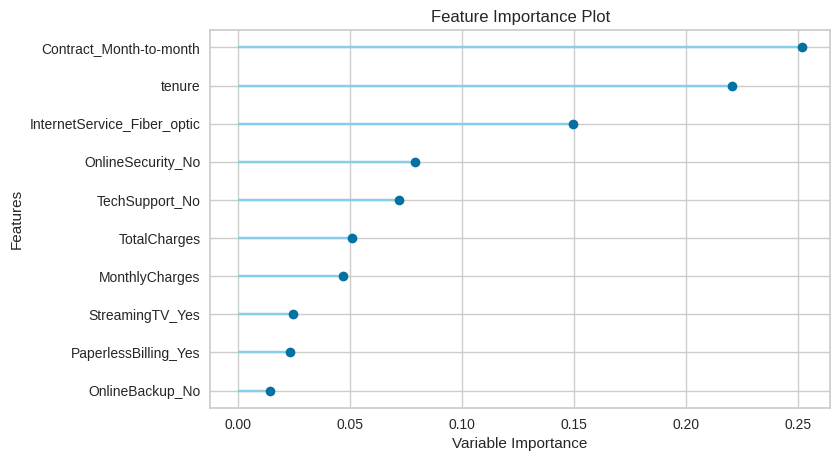

In [194]:
# Verificar importância das variáveis
pyclass.plot_model(tuned_gbc, 'feature')

In [195]:
tuned_holdout = pyreg.predict_model(tuned_gbc, data = df_test)
df_Pycaret_Label_Score.append(tuned_holdout[['Label','Score']])
#tuned_holdout['Churn'] = round(tuned_holdout['Label'], 0)
#tuned_holdout['Churn'] = tuned_holdout['Churn'].astype('int')
tuned_holdout['Label'].value_counts()


0    1130
1     279
Name: Label, dtype: int64

In [ ]:
df_Pycaret_Label_Score = tuned_holdout[['Label','Score']]

In [191]:
df_submit = pd.DataFrame(zip(tuned_holdout.index, tuned_holdout['Label']), columns=['id','Churn'])
#df_submit['Churn'] = df_submit['Churn'].astype('int')
df_submit.to_csv('Churn_pycaret_gbc_tuned_F1.csv', index=False, sep=',')

In [192]:
df_submit['Churn'].value_counts()

0    1130
1     279
Name: Churn, dtype: int64

In [ ]:
data = df_train
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt_custom = tune_model(data, custom_grid = params)
# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

In [ ]:
_train